In [3]:
!pip install torchvision
!pip install torch
!pip install pyyaml
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
import torch
!pip install 'git+https://ghproxy.com/https://github.com/facebookresearch/detectron2.git'


2.0.1+cu118 True
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

  Cloning https://ghproxy.com/https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-sfsxhf9d
  Running command git clone --filter=blob:none --quiet https://ghproxy.com/https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-sfsxhf9d
  Resolved https://ghproxy.com/https://github.com/facebookresearch/detectron2.git to commit 4e80df1e58901557e2824ce3b488d30209a9be33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import matplotlib.pyplot as plt
import pandas as pd

In [36]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


Mounted at /gdrive


In [42]:
def get_detectron_predictor():
  cfg = get_cfg()
  # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
  cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml"))
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set threshold for this model
  # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml")
  predictor = DefaultPredictor(cfg)
  return predictor

def detectron_predict(predictor, im):
  outputs = predictor(im)
  return outputs

predictor = get_detectron_predictor()

[10/14 19:32:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl ...


In [49]:
from matplotlib import pyplot as plt
global outputs_predict_list
outputs_predict_list = []
counter = 1
im = cv2.imread(str('/gdrive/My Drive/WashU/Hack WashU 2023/test1.jpg'))
#print (im)
outputs_predict = detectron_predict(predictor, im)
keypoints = outputs_predict["instances"].pred_keypoints
print (keypoints)
x=keypoints[0,:,0].tolist()
y=keypoints[0,:,1].tolist()
#x=keypoints[1,:,0].tolist() + keypoints[0,:,0].tolist()
#y=keypoints[1,:,1].tolist() + keypoints[0,:,1].tolist()
print (x)
print (y)
counter += 1
outputs_predict_list.append((x,y))


tensor([[[7.2463e+02, 4.3455e+02, 1.1259e+00],
         [7.3902e+02, 4.1874e+02, 2.7685e+00],
         [7.1024e+02, 4.2017e+02, 1.4668e+00],
         [7.7069e+02, 4.1730e+02, 1.5711e+00],
         [6.9440e+02, 4.2449e+02, 6.4208e-01],
         [8.1387e+02, 5.1939e+02, 2.2637e-01],
         [6.7281e+02, 5.0932e+02, 4.0152e-01],
         [8.3978e+02, 6.2291e+02, 4.6724e-01],
         [6.4546e+02, 6.1141e+02, 4.7015e-01],
         [8.3978e+02, 7.2500e+02, 6.8416e-01],
         [6.1524e+02, 6.9912e+02, 8.0679e-01],
         [7.7501e+02, 7.2931e+02, 8.2989e-02],
         [6.8721e+02, 7.2500e+02, 1.2384e-01],
         [7.6637e+02, 8.8460e+02, 2.7608e-01],
         [6.6705e+02, 8.8173e+02, 5.1434e-01],
         [7.6061e+02, 1.0255e+03, 1.5748e-01],
         [7.3614e+02, 9.6656e+02, 2.1504e-01]]], device='cuda:0')
[724.6298828125, 739.023681640625, 710.2361450195312, 770.68994140625, 694.403076171875, 813.8712158203125, 672.8124389648438, 839.7799682617188, 645.4642333984375, 839.7799682617188

([724.6298828125, 739.023681640625, 710.2361450195312, 770.68994140625, 694.403076171875, 813.8712158203125, 672.8124389648438, 839.7799682617188, 645.4642333984375, 839.7799682617188, 615.2373657226562, 775.008056640625, 687.2061767578125, 766.3717651367188, 667.0548706054688, 760.6143188476562, 736.1448974609375], [434.5514831542969, 418.73504638671875, 420.1728820800781, 417.2971496582031, 424.4864807128906, 519.3851928710938, 509.3201599121094, 622.9110107421875, 611.4081420898438, 724.9990844726562, 699.1175537109375, 729.3126831054688, 724.9990844726562, 884.6014404296875, 881.7257080078125, 1025.51171875, 966.5594482421875])


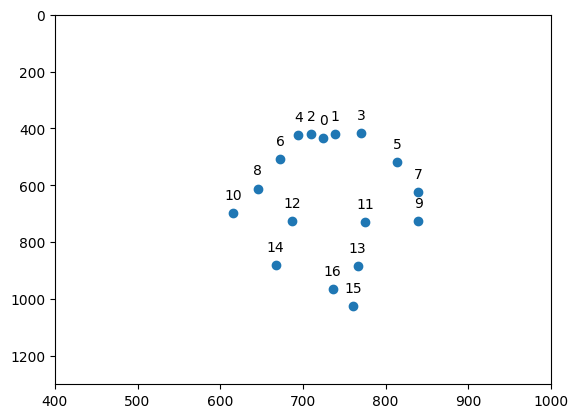

In [52]:
keypoints_list = outputs_predict_list
frame_keypoints = keypoints_list[0]
print (frame_keypoints)
counter = 1
x=frame_keypoints[0]
y=frame_keypoints[1]
#print(x)
plt.xlim(400, 1000)
plt.ylim(0, 1300)
plt.gca().invert_yaxis()
plt.scatter(x, y)
count = 0
for xx,yy in zip(x,y):
    label = count
    count +=1
    plt.annotate(label,
                (xx,yy),
                textcoords='offset points',
                xytext=(0,10),
                ha='center')



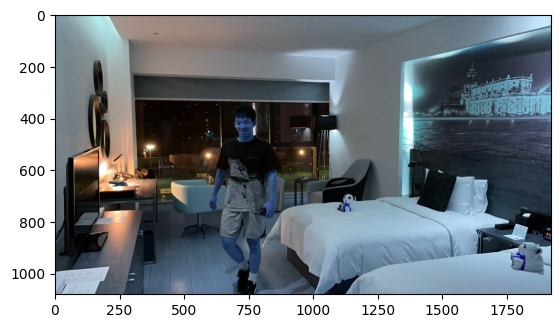

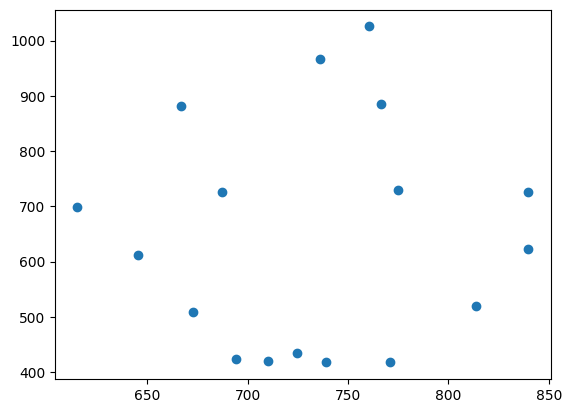

In [53]:
from matplotlib import pyplot as plt
keypoints_list = outputs_predict_list

im = cv2.imread(str('/gdrive/My Drive/WashU/Hack WashU 2023/test1.jpg'))

plt.imshow(im)
plt.show()

keys = keypoints_list[0]
plt.scatter(x = keys[0], y = keys[1])

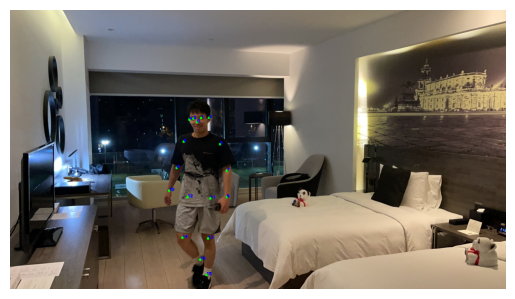

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assuming keypoints_list contains the detected keypoints
# Assuming 'im' is the original image loaded with cv2.imread()

# Extract keypoints from the keypoints_list (assuming the format of keypoints_list is correct)
keys = keypoints_list[0]

# Create an image with the same size as the original image and fill it with white color
combined_image = 255 * np.ones_like(im)

# Draw the original image on the combined image
combined_image[0:im.shape[0], 0:im.shape[1]] = im

# Draw keypoints on the combined image and label them from 0 to 16
for i in range(len(keys[0])):
    x, y = int(keys[0][i]), int(keys[1][i])
    cv2.circle(combined_image, (x, y), 5, (0, 255, 0), -1)  # Draw a green circle at each keypoint
    # Label the keypoints with numbers from 0 to 16
    cv2.putText(combined_image, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the combined image with original image and labeled keypoints
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

